## Adolescent Fertility Rate

In this problem set we will guide you through different ways of accessing real data sets and how to summarize and describe it properly. First we will go through some of the data that is collected by the World Bank. We will do some cleaning on the data before we start analyzing it. Then, we will try to do a simple web scraping exercise where we will analyze the data as well.


Let’s start with this dataset from the World Bank.  Please download and save this file in a folder where you can get it easily.

This dataset is from the World Bank Gender Statistics website. You may visit the website and explore other datasets they offer. However, for the purposes of this assignment, please use the file in this set of instructions, since the dataset on the World Bank website may have been updated in the time since this problem set and answer key was posted.



For the purpose of analyzing the data, we are going to use Python. WE are going to see there are multiple indicators of gender, countries and years in the data. 

In this case we are just interested in analyzing the data for one indicator that is the Adolescent Fertility Rate, in the data the indicator code for this variable is called SP.ADO.TFRT . 

This indicator measures the annual number of births to women 15 to 19 years of age per 1,000 women in that age group. It represents the risk of childbearing among adolescent women 15 to 19 years of age. It is also referred to as the age-specific fertility rate for women aged 15-19. Once we complete this assignment set we’ll have more information of how this rate has evolved over time and how it varies across different groups of countries.

In [2]:
import pandas as pd
%matplotlib inline 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
#sns.distplot(np.random.binomial(8,0.2,1000),kde=False,norm_hist=True)

In [3]:
data = pd.read_csv("/home/Navneet/Gender_StatsData (1).csv")
print(data.shape)
teenager_fr = data[data["Indicator Code"] == "SP.ADO.TFRT"]
print(teenager_fr.shape)
teenager_fr.head()

(165690, 63)
(263, 63)


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
8,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,133.580357,134.183621,134.886474,134.540705,134.149424,133.621761,...,50.047409,49.944262,49.818562,49.676750,49.088242,48.479108,47.818493,NaN,NaN,NaN
638,Caribbean small states,CSS,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,162.799240,162.849609,163.123821,161.155269,159.441456,157.733145,...,62.249749,61.360740,60.517666,59.603078,58.409630,57.160052,55.853669,NaN,NaN,NaN
1268,Central Europe and the Baltics,CEB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,46.716752,46.054425,45.345639,45.529701,45.684331,45.834355,...,21.428494,21.088440,20.811315,20.629395,20.062750,19.519840,18.947362,NaN,NaN,NaN
1898,Early-demographic dividend,EAR,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,116.431916,116.743848,117.052144,117.173139,117.226848,117.201368,...,49.171107,47.685946,46.181590,44.653303,43.179135,41.685074,40.175944,NaN,NaN,NaN
2528,East Asia & Pacific,EAS,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,66.001714,64.895357,63.841032,61.971833,60.206090,58.585212,...,18.857649,19.334606,19.866540,20.411074,20.907671,21.358688,21.738901,NaN,NaN,NaN


Now, we are interested in plotting the evolution of the Adolescent Fertility Rate from 1960 to 2015. 
In addition, we are interested in having different information in the same plot. 
First, we want to plot the sample mean of all the data set, but also we want to add more information such as the rate for low, middle and high income countries (an indicator for country code is stored in the variable "Country Code").

Inspect this variable to get a sense of what it contains. Note that it includes indicators for both countries, regions, and income group.  Since we are only interested in the trends by income group, we want to filter the data to contain only the fertility rate for high, middle, and low income countries as well as the world average.

In [4]:
#teenager_fr.iloc[:,4:-3].plot(subplots=True, layout=(8,7));
byincomelevel = teenager_fr[teenager_fr['Country Code'].isin(["MIC", "LIC","HIC","WLD"])]
byincomelevel

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
8828,High income,HIC,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,45.568781,45.505764,45.412266,44.655191,43.893620,43.190973,...,19.658784,18.831649,18.010335,17.134966,15.846430,14.557770,13.294822,NaN,NaN,NaN
16388,Low income,LIC,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,136.809699,137.151934,137.260903,137.095157,137.155900,137.553544,...,111.512123,109.093451,106.634921,104.160008,101.565752,98.975745,96.406132,NaN,NaN,NaN
19538,Middle income,MIC,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,94.992020,94.991438,94.512157,93.019454,91.461136,89.932035,...,43.156538,42.864204,42.544629,42.204127,41.718475,41.140721,40.449470,NaN,NaN,NaN
28358,World,WLD,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,86.543221,86.358207,85.849010,84.514825,83.239324,82.134471,...,47.124429,46.809078,46.449420,46.067217,45.514490,44.883085,44.150339,NaN,NaN,NaN


In [5]:
byincomelevel = teenager_fr[teenager_fr['Country Code'].isin(["MIC", "LIC","HIC","WLD"])]
byincomelevel_T = byincomelevel.T
byincomelevel_T.columns = byincomelevel_T.iloc[0]
byincomelevel_T

Country Name,High income,Low income,Middle income,World
Country Name,High income,Low income,Middle income,World
Country Code,HIC,LIC,MIC,WLD
Indicator Name,"Adolescent fertility rate (births per 1,000 wo...","Adolescent fertility rate (births per 1,000 wo...","Adolescent fertility rate (births per 1,000 wo...","Adolescent fertility rate (births per 1,000 wo..."
Indicator Code,SP.ADO.TFRT,SP.ADO.TFRT,SP.ADO.TFRT,SP.ADO.TFRT
1960,45.5688,136.81,94.992,86.5432
...,...,...,...,...
2014,14.5578,98.9757,41.1407,44.8831
2015,13.2948,96.4061,40.4495,44.1503
2016,NaN,NaN,NaN,NaN
2017,NaN,NaN,NaN,NaN


In [6]:
byincomelevel = teenager_fr[teenager_fr['Country Code'].isin(["MIC", "LIC","HIC","WLD"])]
byincomelevel_T = byincomelevel.T
byincomelevel_T.columns = byincomelevel_T.iloc[0]
byincomelevel_T = byincomelevel_T.iloc[4:-3,:]
byincomelevel_T.columns.rename("Year",inplace=True)
byincomelevel_T.head()

Year,High income,Low income,Middle income,World
1960,45.5688,136.81,94.992,86.5432
1961,45.5058,137.152,94.9914,86.3582
1962,45.4123,137.261,94.5122,85.849
1963,44.6552,137.095,93.0195,84.5148
1964,43.8936,137.156,91.4611,83.2393


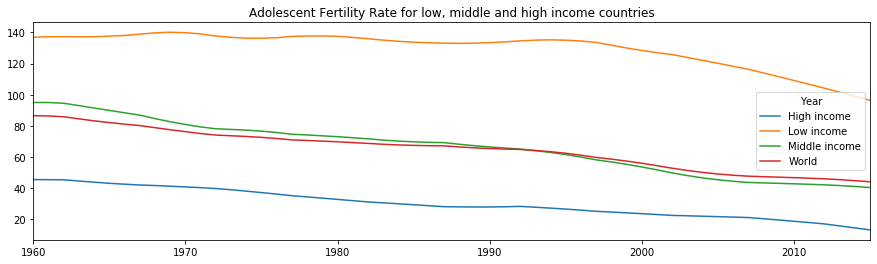

In [7]:
#plt.figure(figsize=(20,10))
byincomelevel_T.plot(figsize=(15,4));
plt.title("Adolescent Fertility Rate for low, middle and high income countries");

Conclusions:
1. While the rate for high income countries presents a decreasing trend in the period, the rate for low income countries fluctuates until the mid-nineties when it becomes to decrease significantly.
2. The gap between high and middle income countries is lower in 2014 than in 1960, while the gap between low and middle income countries is actually larger in 2014 than it is in 1960.
3. Since the mid-nineties, the rate for low income countries has decreased more than it has for high and middle income countries. 

Now, we are not going to consider the trends of the different categories over the years. Instead, we are going to compare how the distribution of the Adolescent Fertility Rate is different between 1960 and 2000.

Histogram

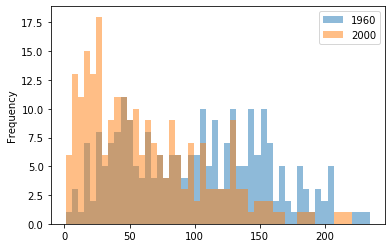

In [8]:
teenager_fr[["1960","2000"]].plot(kind="hist",alpha=0.5,bins=50)

KDE

BandWidth =  0.1


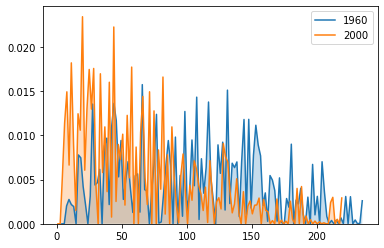

BandWidth =  0.15000000000000002


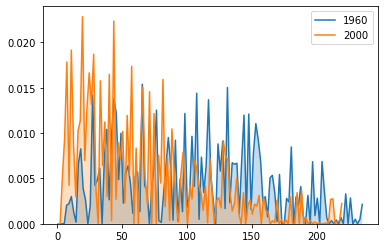

BandWidth =  0.2


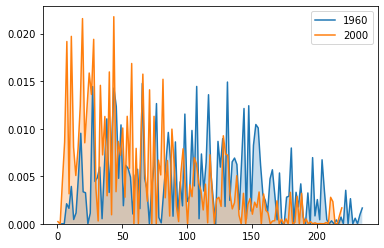

In [9]:
kernel = ["gau","cos","biw","epa","tri","triw"]
bw = ["scott", "silverman"]
b_ = np.linspace(0.1, 0.2, num=3)
#bw.append(b_)
for a in b_:
    print("BandWidth = ",a)
    sns.kdeplot(teenager_fr["1960"].dropna(),shade=True,bw=a)
    sns.kdeplot(teenager_fr["2000"].dropna(),shade=True,bw=a)
    plt.show()

CDF

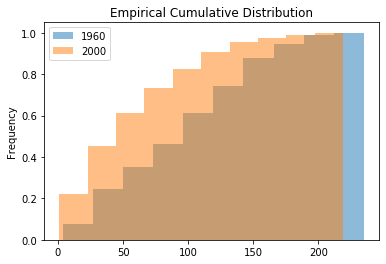

In [10]:
plt.title("Empirical Cumulative Distribution");
teenager_fr["1960"].dropna().plot(kind="hist",density=True,cumulative=True,alpha=0.5,legend = True);
teenager_fr["2000"].dropna().plot(kind="hist",density=True,cumulative=True,alpha=0.5,legend = True);
#sns.kdeplot(teenager_fr["2000"].dropna(),cumulative=True)

 We can determine whether the distribution used to construct the 1960 series satisfies the First Order Stochastic Dominance property over the distribution used to construct the 2000 series.

In [11]:
# cf = pd.Series(teenager_fr["1960"].dropna()).value_counts(normalize=True).sort_index().cumsum()
# sns.barplot(x=cf.index[200:], y=cf.values[00:], palette="rocket")

## Plotting Marginal, Conditional and Joint PDF 

Plotting Joint PDF

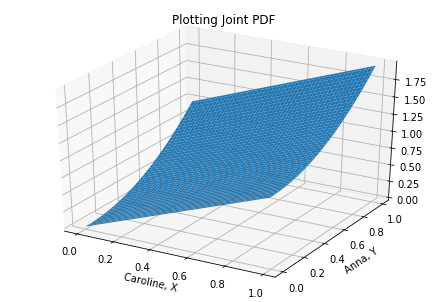

In [33]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

b = np.arange(0.0, 1.0, 0.01)
d = np.arange(0.0, 1.0, 0.01)

B, D = np.meshgrid(b, d)
#nu = []
nu = (B+(D**2))

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(B, D, nu)
plt.xlabel('Caroline, X')
plt.ylabel('Anna, Y')
plt.title("Plotting Joint PDF");
plt.show()

Plotting Conditional Distribution (X/Y)

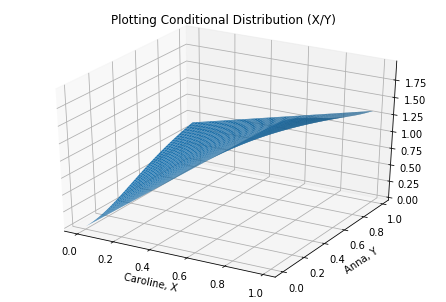

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

b = np.arange(0.0, 1.0, 0.01)
d = np.arange(0.0, 1.0, 0.01)

B, D = np.meshgrid(b, d)
#nu = []
nu = (B+(D**2))/(0.5+(D**2))

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(B, D, nu)
plt.xlabel('Caroline, X')
plt.ylabel('Anna, Y')
plt.title("Plotting Conditional Distribution (X/Y)");
plt.show()

Marginal PDF

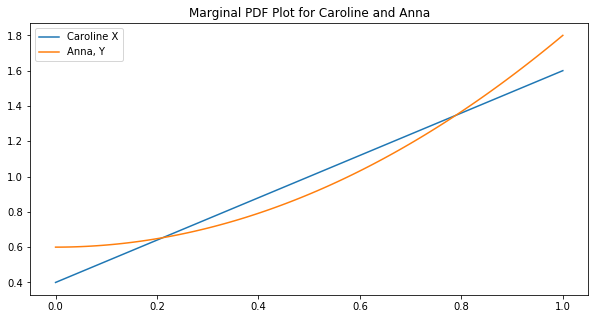

In [37]:
x = np.linspace(0,1,100)
plt.figure(figsize=(10,5));
# the function, which is y = x^2 here
y = (6/5)*(x+(1/3))
plt.figure
plt.plot(x,y, label="Caroline X");

y = (6/5)*(x**2+(1/2))
plt.plot(x,y, label="Anna, Y")
plt.legend(loc="upper left");
plt.title("Marginal PDF Plot for Caroline and Anna");

CDF of X and Y to check FOSD(First Order Stochastic Dominance, https://en.wikipedia.org/wiki/Stochastic_dominance)

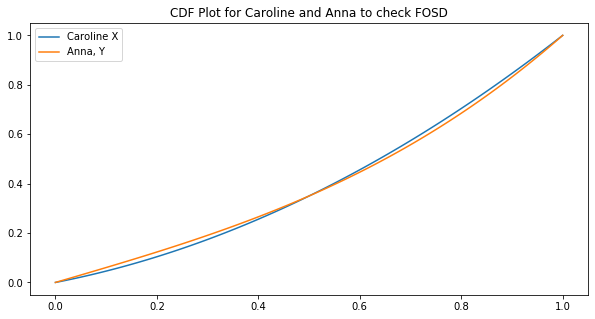

In [38]:
x = np.linspace(0,1,100)
plt.figure(figsize=(10,5));
# the function, which is y = x^2 here
y = (6/5)*((x**2)/2+(x/3))
plt.figure
plt.plot(x,y, label="Caroline X");

y = (6/5)*((x**3)/3+(x/2))
plt.plot(x,y, label="Anna, Y")
plt.legend(loc="upper left");
plt.title("CDF Plot for Caroline and Anna to check FOSD");

Since it is not the case that one of the CDF's is always below the other, we can't say that there is FOSD between random variables  𝑋  and  𝑌 .